In [2]:
# Bibliotecas 

import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# DataSet de Moradores em domicílios particulares permanentes ocupados, por tipo de esgotamento sanitário, segundo grupos de idade e cor ou raça.

df_cor_raca_full = bd.read_table(
    dataset_id='br_ibge_censo_2022',
    table_id='morador_cor_raca_esgotamento_sanitario_municipio',
    billing_project_id='opendataday2024-416318'
)

Downloading: 100%|██████████| 5263650/5263650 [05:46<00:00, 15207.88rows/s]


In [4]:
df_cor_raca_full.head(10)

,ano,id_municipio,tipo_esgotamento_sanitario,grupo_idade,cor_raca,moradores
0,2022,1100031,"Rede geral, rede pluvial ou fossa ligada à rede",0 a 4 anos,Parda,<NA>
1,2022,1100122,Vala,0 a 4 anos,Parda,16
2,2022,1100122,Outra forma,0 a 4 anos,Parda,4
3,2022,1100205,Vala,0 a 4 anos,Parda,381
4,2022,1301308,Fossa séptica ou fossa filtro não ligada à rede,0 a 4 anos,Parda,75
5,2022,1302405,"Rio, lago, córrego ou mar",0 a 4 anos,Parda,387
6,2022,1303106,Fossa rudimentar ou buraco,0 a 4 anos,Parda,1663
7,2022,1303205,Rede geral ou pluvial,0 a 4 anos,Parda,79
8,2022,1303403,Vala,0 a 4 anos,Parda,221
9,2022,1303502,Outra forma,0 a 4 anos,Parda,104


In [5]:
df_cor_raca_full.dtypes

ano                            Int64
id_municipio                  object
tipo_esgotamento_sanitario    object
grupo_idade                   object
cor_raca                      object
moradores                      Int64
dtype: object

In [6]:
# Tratamento do campo de municipio
df_cor_raca_full['id_municipio'] = pd.to_numeric(df_cor_raca_full['id_municipio'], errors='coerce').astype('Int64')

In [8]:
# Filtro Baixda Santista

# Lista dos municipios da baixada santista usada para filtro
municipios = [3548500,3551009,3541000,3518701,3513504,3506359]


#Filtro dataset esgotameto
df_cor_raca_bx = df_cor_raca_full[df_cor_raca_full['id_municipio'].isin(municipios)]


# Tratamento para adicionar a descrição da cidade
descricao_dict = {3548500: 'Santos', 3551009: 'São Vicente', 3541000: 'Praia Grande', 3518701: 'Guarujá', 3513504: 'Cubatão', 3506359: 'Bertioga'}
df_cor_raca_bx['Descricao_Cidade'] = df_cor_raca_bx['id_municipio'].map(descricao_dict)

In [27]:
df_cor_raca_bx['tipo_esgotamento_sanitario'].unique()

array(['Fossa séptica ou fossa filtro ligada à rede',
       'Fossa séptica ou fossa filtro não ligada à rede', 'Outra forma',
       'Rede geral, rede pluvial ou fossa ligada à rede',
       'Fossa rudimentar ou buraco', 'Rio, lago, córrego ou mar',
       'Não tinham banheiro nem sanitário', 'Rede geral ou pluvial',
       'Vala'], dtype=object)

In [34]:
df_buraco = df_cor_raca_bx[df_cor_raca_bx['tipo_esgotamento_sanitario'] == 'Fossa rudimentar ou buraco']

In [12]:
df_buraco.head(10)

,ano,id_municipio,tipo_esgotamento_sanitario,grupo_idade,cor_raca,moradores,Descricao_Cidade
5468,2022,3551009,Fossa rudimentar ou buraco,0 a 4 anos,Amarela,<NA>,São Vicente
28406,2022,3513504,Fossa rudimentar ou buraco,5 a 9 anos,Parda,163,Cubatão
29630,2022,3551009,Fossa rudimentar ou buraco,5 a 9 anos,Amarela,<NA>,São Vicente
35201,2022,3541000,Fossa rudimentar ou buraco,5 a 9 anos,Branca,22,Praia Grande
38728,2022,3506359,Fossa rudimentar ou buraco,5 a 9 anos,Preta,28,Bertioga
40996,2022,3506359,Fossa rudimentar ou buraco,5 a 9 anos,Branca,84,Bertioga
48973,2022,3513504,Fossa rudimentar ou buraco,5 a 9 anos,Branca,105,Cubatão
58447,2022,3513504,Fossa rudimentar ou buraco,10 a 14 anos,Preta,20,Cubatão
66127,2022,3548500,Fossa rudimentar ou buraco,10 a 14 anos,Parda,43,Santos
72862,2022,3518701,Fossa rudimentar ou buraco,10 a 14 anos,Branca,61,Guarujá


In [14]:
df_buraco['cor_raca'].unique()

array(['Amarela', 'Parda', 'Branca', 'Preta', 'Indígena'], dtype=object)

In [62]:
# Cria um dataset de crianças 

grupo_idade = ['0 a 4 anos','5 a 9 anos','10 a 14 anos']

df_buraco_crianca = df_buraco[df_buraco['grupo_idade'].isin(grupo_idade)]
df_buraco_crianca_agg = df_buraco_crianca.groupby(['Descricao_Cidade'])['moradores'].sum().sort_values(ascending=False)

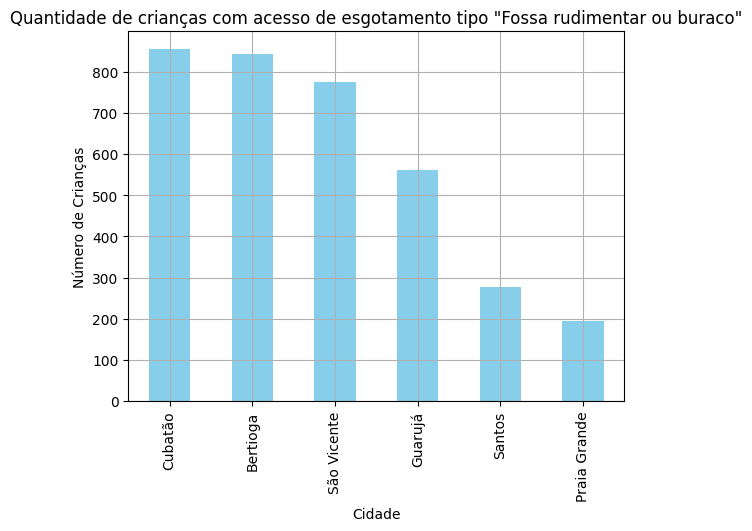

In [63]:
# Gráfico

df_buraco_crianca_agg.plot(kind='bar', color='skyblue')


plt.xlabel('Cidade')
plt.ylabel('Número de Crianças')
plt.title('Quantidade de crianças com acesso de esgotamento tipo "Fossa rudimentar ou buraco"')

# Mostrar o gráfico
plt.grid(True)
plt.show()

In [65]:
df_buraco_crianca.columns

df_cubatao = df_buraco_crianca[df_buraco_crianca['Descricao_Cidade'] == 'Cubatão']

In [67]:
df_cubatao_agg = df_cubatao.groupby(['cor_raca'])['moradores'].sum().sort_values(ascending=False)

In [68]:
df_cubatao_agg

cor_raca
Parda       477
Branca      331
Preta        46
Indígena      1
Amarela       0
Name: moradores, dtype: Int64

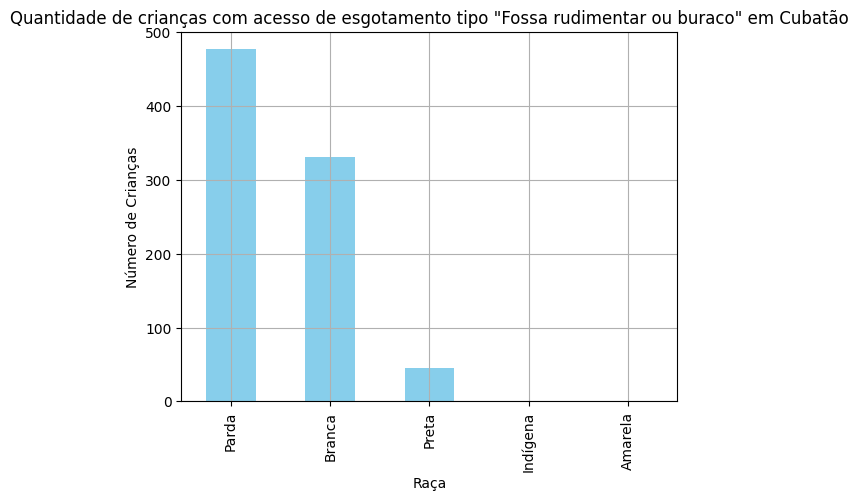

In [70]:
# Gráfico

df_cubatao_agg.plot(kind='bar', color='skyblue')


plt.xlabel('Raça')
plt.ylabel('Número de Crianças')
plt.title('Quantidade de crianças com acesso de esgotamento tipo "Fossa rudimentar ou buraco" em Cubatão')

# Mostrar o gráfico
plt.grid(True)
plt.show()